### Data analysis and a simple decision tree example using data from https://www.kaggle.com/uciml/zoo-animal-classification

In [1]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from collections import Counter

Read the data file

In [2]:
zoo_df = pd.read_csv("data\Decision-Tree_Zoo-Data\zoo-animal-classification\zoo.csv")

animal_name is not useful in classification. remove it from data set

In [3]:
animal_names = zoo_df['animal_name'].to_list()
print(animal_names)
zoo_df = zoo_df.drop('animal_name', axis=1)

['aardvark', 'antelope', 'bass', 'bear', 'boar', 'buffalo', 'calf', 'carp', 'catfish', 'cavy', 'cheetah', 'chicken', 'chub', 'clam', 'crab', 'crayfish', 'crow', 'deer', 'dogfish', 'dolphin', 'dove', 'duck', 'elephant', 'flamingo', 'flea', 'frog', 'frog', 'fruitbat', 'giraffe', 'girl', 'gnat', 'goat', 'gorilla', 'gull', 'haddock', 'hamster', 'hare', 'hawk', 'herring', 'honeybee', 'housefly', 'kiwi', 'ladybird', 'lark', 'leopard', 'lion', 'lobster', 'lynx', 'mink', 'mole', 'mongoose', 'moth', 'newt', 'octopus', 'opossum', 'oryx', 'ostrich', 'parakeet', 'penguin', 'pheasant', 'pike', 'piranha', 'pitviper', 'platypus', 'polecat', 'pony', 'porpoise', 'puma', 'pussycat', 'raccoon', 'reindeer', 'rhea', 'scorpion', 'seahorse', 'seal', 'sealion', 'seasnake', 'seawasp', 'skimmer', 'skua', 'slowworm', 'slug', 'sole', 'sparrow', 'squirrel', 'starfish', 'stingray', 'swan', 'termite', 'toad', 'tortoise', 'tuatara', 'tuna', 'vampire', 'vole', 'vulture', 'wallaby', 'wasp', 'wolf', 'worm', 'wren']


In [4]:
for column in zoo_df.columns:
    zoo_df[column] = zoo_df[column].astype("category")

In [5]:
# copy X columns
X = zoo_df.loc[:, zoo_df.columns != 'class_type']
# copy Y column (class)
y = zoo_df['class_type']
column_names = X.columns

In [6]:
y_counter = Counter(y)
print(y_counter)

Counter({1: 41, 2: 20, 4: 13, 7: 10, 6: 8, 3: 5, 5: 4})


In [7]:
oversampler = SMOTE(k_neighbors=1)
X, y = oversampler.fit_resample(X, y)

In [8]:
y_counter = Counter(y)
print(y_counter)

Counter({1: 41, 4: 41, 2: 41, 7: 41, 6: 41, 5: 41, 3: 41})


## Split the data into training and testing sets

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# split the data (70-30 split)
train_X, test_X, train_Y, test_Y = train_test_split(X, y, test_size = 0.30, stratify = y)

Build the machine learning model

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Predict the class of test data

In [13]:
y_predicted = model.predict(test_X)

How good is the model?
check accuracy

In [14]:
from sklearn.metrics import accuracy_score

In [15]:
print(accuracy_score(test_Y, y_predicted))

0.9655172413793104


Build confusion matrix

In [16]:
from sklearn.metrics import confusion_matrix

In [17]:
c_matrix = confusion_matrix(test_Y, y_predicted)
print(c_matrix)

[[12  0  0  0  0  0  0]
 [ 0 13  0  0  0  0  0]
 [ 0  3 10  0  0  0  0]
 [ 0  0  0 12  0  0  0]
 [ 0  0  0  0 12  0  0]
 [ 0  0  0  0  0 12  0]
 [ 0  0  0  0  0  0 13]]


In [18]:
from collections import Counter

In [19]:
print(Counter(test_Y))

Counter({3: 13, 7: 13, 2: 13, 6: 12, 4: 12, 1: 12, 5: 12})


In [20]:
print(Counter(y_predicted))

Counter({2: 16, 7: 13, 6: 12, 4: 12, 1: 12, 5: 12, 3: 10})


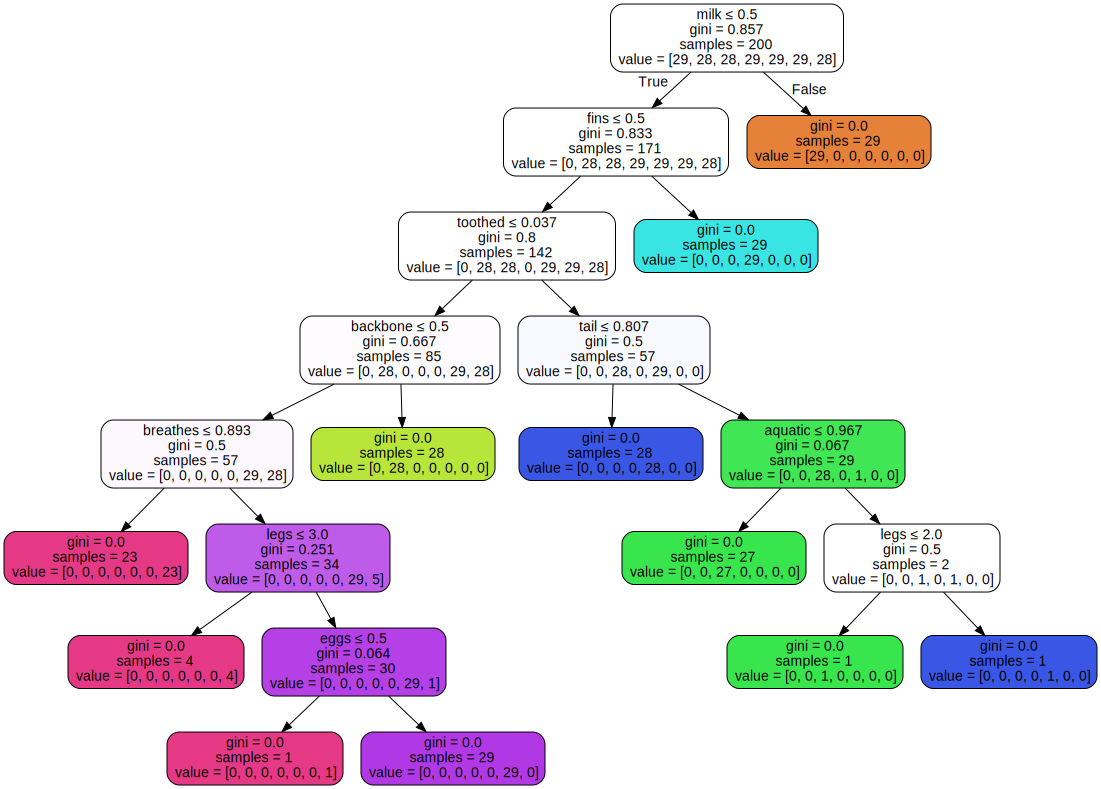

In [21]:
# plot the tree
# for graphing the tree
import graphviz as gv
from sklearn import tree

dot_data = tree.export_graphviz(model, out_file=None, filled=True, rounded = True, special_characters = True
                               , feature_names = column_names)
graph = gv.Source(dot_data)
graph